In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_cop = pd.read_csv("../datasets/LST_Copernicus.csv")
df_mod = pd.read_csv("../datasets/LST_MODIS.csv")
df_meteo = pd.read_csv("../datasets/meteostat_tempratures.csv")


In [6]:
df_cop.set_index('time', inplace=True)
df_mod.set_index('time', inplace=True)
df_meteo.set_index('time', inplace=True)

<Axes: xlabel='time'>

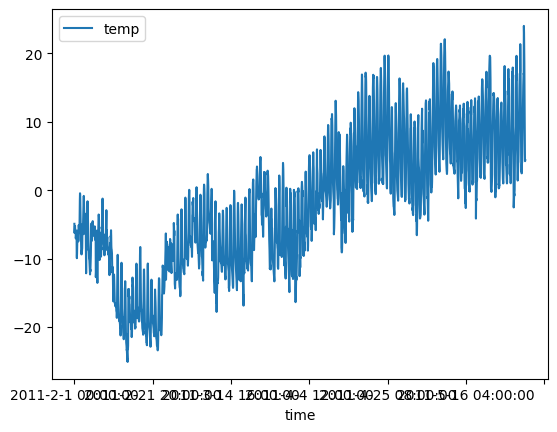

In [7]:
df_cop.plot()

<Axes: xlabel='time'>

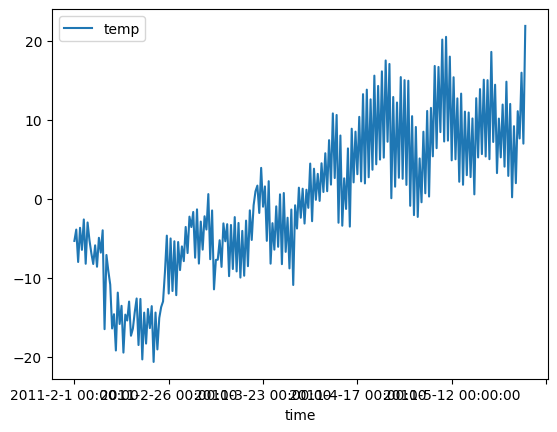

In [8]:
df_mod.plot()

<Axes: xlabel='time'>

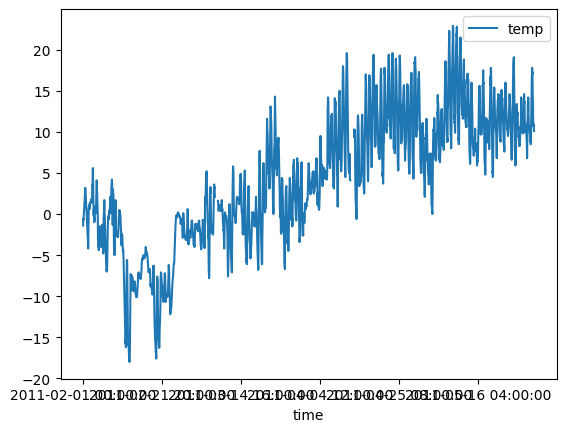

In [9]:
df_meteo.plot()